# Predicting Diamond Prices

### by Travis Gillespie

## Table of Contents
- [Introduction](#intro)
- [Gather Data](#gather)
- [Assess Data](#assess)
- [Clean Data](#clean)
- [Analyze, and Visualize](#analyzing)
    - [Calculate Price Difference](#priceDiff)
    - [Visualization 1](#one)
    - [Visualization 2](#two)
- [Analysis](#analysis)
    - [Understanding the Model](#step1)
    - [My Recommendation](#step3)
- [Store Data](#storing)   
- [Resources](#resources)

<a id='intro'></a>
## Introduction

A jewelry company wants to put in a bid to purchase a large set of diamonds, but is unsure how much it should bid. The results from a predictive model were used to make a recommendation on how much the jewelry company should bid for a set of 3,000 diamonds in USD (United States Dollar).

1. Carat represents the weight of the diamond, and is a numerical variable.
* Cut represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. Each of these categories are represented by a number, 1-5, in the Cut_Ord variable.
* Clarity represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS1, VS2, VVS2, VVS1, and IF. Each of these categories are represented by a number, 1-8, in the Clarity_Ord variable.
* Note: Transforming category variables to ordinal variables like this is not always appropriate, but we’ve done it here for simplicity.


<a id='intro'></a>
### Termonolgy

1. _Carat_ represents the weight of the diamond, and is a numerical variable.
* _Cut_ represents the quality of the cut of the diamond, and falls into 5 categories: fair, good, very good, ideal, and premium. Each of these categories are represented by a number, 1-5, in the *Cut_Ord* variable.
* _Clarity_ represents the internal purity of the diamond, and falls into 8 categories: I1, SI2, SI1, VS1, VS2, VVS2, VVS1, and IF. Each of these categories are represented by a number, 1-8, in the *Clarity_Ord* variable.
* Note: Transforming category variables to ordinal variables like this is not always appropriate, but we’ve done it here for simplicity.

<a id='gather'></a>
## Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import seaborn as sns
import scipy.stats as stats

In [2]:
df_given_original = pd.read_csv('./diamond-data/diamonds.csv')

In [3]:
df_predicted_original = pd.read_csv('./diamond-data/new-diamonds.csv')

In [4]:
df_given = df_given_original.copy()

In [5]:
df_predicted = df_predicted_original.copy()

<a id='assess'></a>
## Assess Data

In [6]:
df_predicted.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


<a id='clean'></a>
## Clean Data

In [7]:
# df.rename(columns={ df.columns[0]: "index" }, inplace = True)
df_predicted.drop(columns={ df_predicted.columns[0]}, inplace = True)

In [8]:
df_predicted.head()

,carat,cut,cut_ord,color,clarity,clarity_ord
0,1.22,Premium,4,G,SI1,3
1,1.01,Good,2,G,VS2,5
2,0.71,Very Good,3,I,VS2,5
3,1.01,Ideal,5,D,SI2,2
4,0.27,Ideal,5,H,VVS2,6


In [9]:
# linear regression model
# - 5,269 + 8,413 x Carat + 158.1 x Cut + 454 x Clarity

given1 = -5269
given2 = 8413
given3 = 158.1
given4 = 454

df_predicted['price'] = given1 + (given2 * df_predicted['carat']) + (given3 * df_predicted['cut_ord']) + (given4 * df_predicted['clarity_ord'])
# df.sort_values(['price'], inplace = True)
df_predicted.head(3)


,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1.22,Premium,4,G,SI1,3,6989.26
1,1.01,Good,2,G,VS2,5,5814.33
2,0.71,Very Good,3,I,VS2,5,3448.53


In [10]:
# bid price, 70% of pridicted final price

df_predicted['bid'] = df_predicted['price'] * 0.7
df_predicted.head(3)

,carat,cut,cut_ord,color,clarity,clarity_ord,price,bid
0,1.22,Premium,4,G,SI1,3,6989.26,4892.482
1,1.01,Good,2,G,VS2,5,5814.33,4070.031
2,0.71,Very Good,3,I,VS2,5,3448.53,2413.971


In [11]:
df_predictedNegativePrices = df_predicted[df_predicted.price < 0]
df_predictedNegativePrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 13 to 2963
Data columns (total 8 columns):
carat          291 non-null float64
cut            291 non-null object
cut_ord        291 non-null int64
color          291 non-null object
clarity        291 non-null object
clarity_ord    291 non-null int64
price          291 non-null float64
bid            291 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 20.5+ KB


<a id='priceDiff'></a>
### Calculate Price Difference

In [12]:
# df_given.at[df_given['carat'].eq(1).idxmax(),'bid']

In [13]:
# df_given.loc[df_given['carat'] == 1, 'bid'].iloc[0]

In [14]:
def returnDiamonPrice(carat, cut, clarity):
    return df_predicted.loc[(df_predicted['carat'] == carat) &
                            (df_predicted['cut'] == cut) &
                            (df_predicted['clarity'] == clarity)].iloc[0]['price']

In [15]:
# carat = 1
# cut = "Premium"
# clarity = "SI1"
predictedPriceLightDiamond = returnDiamonPrice(1, 'Premium', 'SI1')
predictedPriceLightDiamond

5138.4

In [16]:
# carat = 2
# cut = "Premium"
# clarity = "SI1"
predictedPriceHeavyDiamond = returnDiamonPrice(2, 'Premium', 'SI1')
predictedPriceHeavyDiamond

13551.4

In [17]:
# predictedPriceLightDiamond = 5138.4
# predictedPriceHeavyDiamond = 13551.4
predictedPriceHeavyDiamond - predictedPriceLightDiamond


8413.0

<a id=''></a>
### Calculate Specific Predicted Price

In [18]:
# carat = 1.5
# cut = "Very Good"
# clarity = "VS2"
returnDiamonPrice(1.5, 'Very Good', 'VS2')

10094.8

<a id=''></a>
### Recommended Bid Price

In [19]:
bidPrice = sum(df_predicted['price']*.7)
print("70% of the sum total price is ${:,.2f}".format(bidPrice))

70% of the sum total price is $8,213,465.93


<a id='colorsAndFunctions'></a>
### Colors and Functions

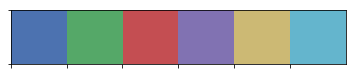

In [20]:
listColors = ['bright',
              'colorblind',
              'dark',
              'deep',
              'muted',
              'pastel'
             ]
    
cmap = sns.color_palette(listColors[3])
sns.palplot(cmap)

# for i in range(0, len(listColors)):
#     color = sns.color_palette(listColors[i])
#     sns.palplot(color)

In [21]:
def getCorr(dataframeParam, xParam, yParam):
        
    calcPears_A = dataframeParam.corr(method = 'pearson')
    print("Corr Method A:")    
    print(calcPears_A)
    print()

    print("Corr Method B:")
    calcCorr = stats.pearsonr(dataframeParam[xParam], dataframeParam[yParam])
    calcPears_B = round(calcCorr[0],2)
    calcP_B = round(calcCorr[1],2)
    print("  Pearson: {}".format(calcPears_B))
    print("  P: {}".format(calcP_B))
    print()    
    
#     calcPears_C = dataframeParam[[xParam, yParam]].corr(method='pearson')[yParam][xParam]
#     print("Corr Method C:")
#     print("  {}".format(calcPears_C))
#     print()
    
#     calcPears_D = np.corrcoef(x = dataframeParam[xParam], y = dataframeParam[yParam])[0][1]
#     print("Corr Method D:")  
#     print("  {}".format(calcPears_D))
#     print()

In [22]:
# REG PLOT
def plotFunctionUnPolished(dataframeParam, xParam, yParam, colorInList):

    sns.jointplot(x=dataframeParam[xParam], 
                      y=dataframeParam[yParam], 
                      ylim = [0,25000],
                      kind='reg', size=8, space=.1, color=cmap[colorInList],
                      scatter_kws={'edgecolor': 'skyblue',
                                   "alpha":.9
                                  })
    plt.show() 



In [23]:
# SCATTER PLOT
def plotFunctionPolished(dataset, dataframeParam, xParam, yParam, colorInList):

    left, width = 0, 10
    bottom, height = 0, 6
    right = left + width
    top = bottom + height
    
    xText = xParam.capitalize()
    yText = yParam.capitalize()

    fig = plt.figure(figsize=(width,height))
    axes = plt.subplot(111)
    
    sns.regplot(data = dataframeParam, x = xParam, y = yParam, 
                ci = 95, color = cmap[colorInList], scatter_kws={'edgecolor': cmap[5], 
                                                                 'linewidth': 1.25, 
                                                                 's':75})
    plt.title('Relationship Between\n{} and {} {}'.format(xText,dataset,yText), fontsize = 18)
    plt.xlabel('Carat', fontsize = 15)
    plt.ylabel('\nPrice', fontsize = 15)
    plt.ylim(-5000,25000)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.tight_layout()

    calcCorr = stats.pearsonr(dataframeParam[xParam], dataframeParam[yParam])
    calcPears = round(calcCorr[0],2)
    calcP = round(calcCorr[1],2)

    # Add a title and a box around it
    ax = plt.gca()
    ax.add_patch(FancyBboxPatch((0.01, 0.807),
                                width=.175, height=.15, clip_on=False,
                                boxstyle="square,pad=0", zorder=3,
                                facecolor='white', alpha=1.0,
                                transform=plt.gca().transAxes))

    plt.text(-0.01, 1.01, "\n\n    Pearson ≈ {} \n    p = {} ".format(calcPears,calcP),
              horizontalalignment='left',
              verticalalignment='top',
              size='large',
              transform=axes.transAxes)

    plt.savefig('./assets/images/relationshipCaratAndPrice_{}'.format(dataset), dpi = 300)
    plt.show()

<a id='one'></a>
### Visualization 1: Given Price

In [24]:
getCorr(df_given, "carat", "price")

Corr Method A:
             Unnamed: 0     carat   cut_ord  clarity_ord     price
Unnamed: 0     1.000000 -0.002164  0.001330     0.000927 -0.001947
carat         -0.002164  1.000000 -0.135679    -0.343725  0.921777
cut_ord        0.001330 -0.135679  1.000000     0.189461 -0.053804
clarity_ord    0.000927 -0.343725  0.189461     1.000000 -0.142159
price         -0.001947  0.921777 -0.053804    -0.142159  1.000000

Corr Method B:
  Pearson: 0.92
  P: 0.0



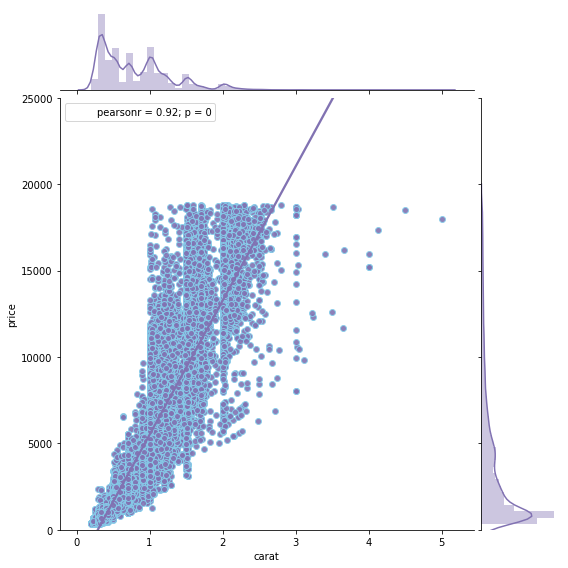

In [25]:
plotFunctionUnPolished(df_given, "carat", "price", 3)

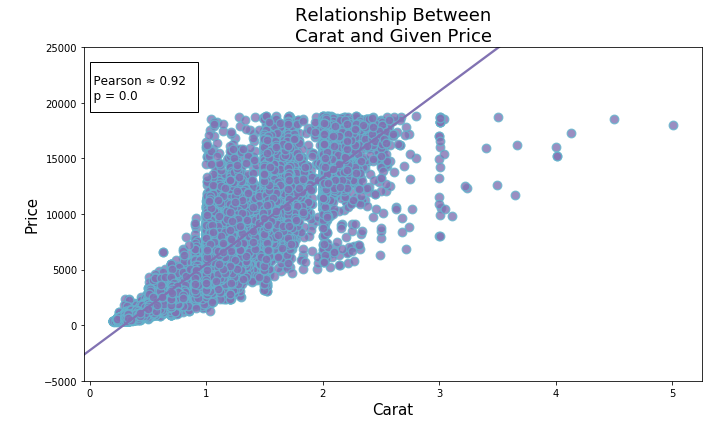

In [26]:
plotFunctionPolished("Given", df_given, "carat", "price", 3)

<a id='two'></a>
### Visualization 2: Predicted Price

In [27]:
getCorr(df_predicted, "carat", "price")

Corr Method A:
                carat   cut_ord  clarity_ord     price       bid
carat        1.000000 -0.113335    -0.368920  0.980307  0.980307
cut_ord     -0.113335  1.000000     0.170511 -0.039627 -0.039627
clarity_ord -0.368920  0.170511     1.000000 -0.183065 -0.183065
price        0.980307 -0.039627    -0.183065  1.000000  1.000000
bid          0.980307 -0.039627    -0.183065  1.000000  1.000000

Corr Method B:
  Pearson: 0.98
  P: 0.0



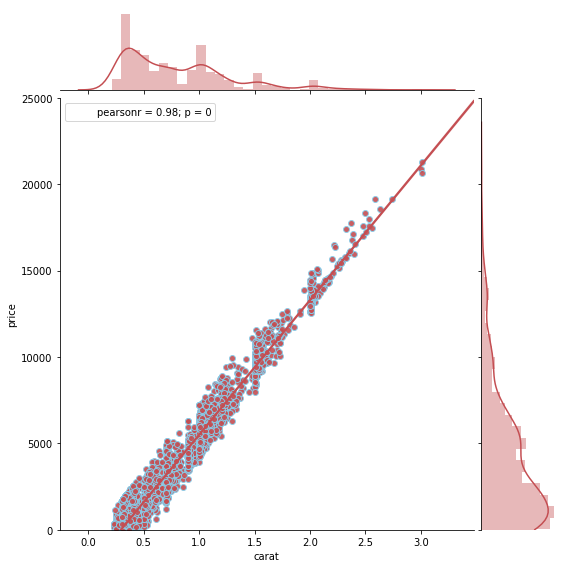

In [28]:
plotFunctionUnPolished(df_predicted, "carat", "price", 2)

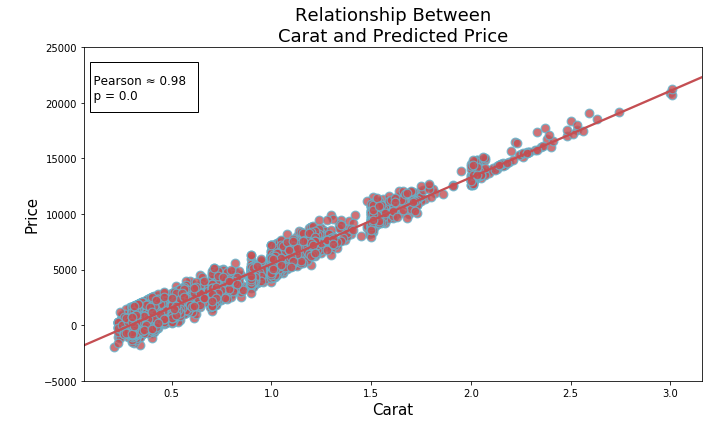

In [29]:
plotFunctionPolished("Predicted", df_predicted, "carat", "price", 2)

<a id='two'></a>
### Visualization 3: Predicted Bid

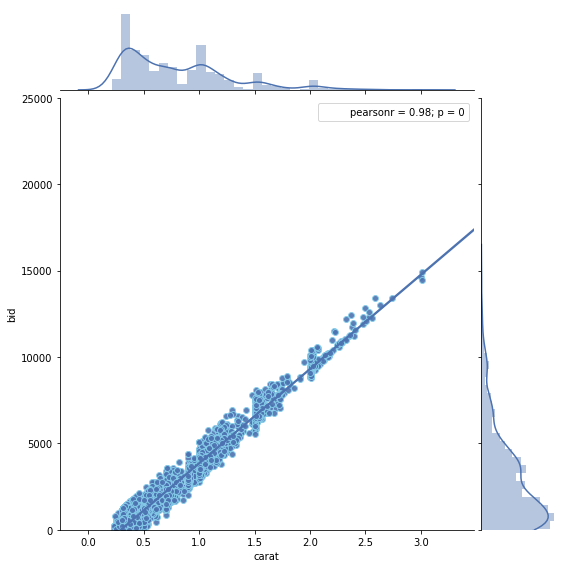

In [30]:
plotFunctionUnPolished(df_predicted, "carat", "bid", 0)

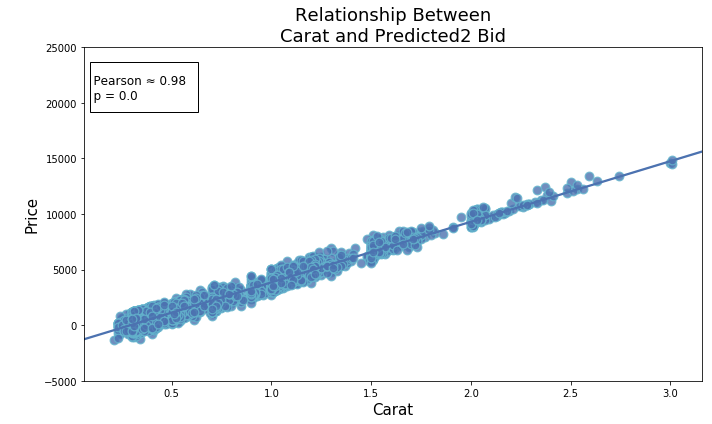

In [31]:
plotFunctionPolished("Predicted2", df_predicted, "carat", "bid", 0)

<a id='analysis'></a>
## Analysis

Analysis and recommendation is located in the [predicting_diamond_prices_Report.ipynb](predicting_diamond_prices_Report.ipynb) file.

<a id='storing'></a>
## Store Data

In [32]:
df_predicted.to_csv('./report/new-diamondsReport.csv', index = False)